,n_treated,deaths_treated,withdrawn_treated,n_untreated,deaths_untreated,withdrawn_untreated,proportion_dead,expected_deaths_treated,expected_deaths_untreated
Time,,,,,,,,,
0,1988,0,54,2317,359,10,0.0834,165,193
1,1934,85,14,1948,88,13,0.0446,86,86
2,1835,90,4,1847,437,26,0.1431,262,264
3,1741,503,31,1384,322,41,0.2640,459,365
4,1207,117,28,1021,231,31,0.1562,188,159


,n_treated,deaths_treated,withdrawn_treated,n_untreated,deaths_untreated,withdrawn_untreated,proportion_dead,expected_deaths_treated,expected_deaths_untreated
Time,,,,,,,,,
4,1207,117,28,1021,231,31,0.1562,188,159
5,1062,264,12,759,344,27,0.3339,354,253
6,786,31,51,388,68,54,0.0843,66,32
7,704,443,32,266,150,36,0.6113,430,162
8,229,31,28,80,15,12,0.1489,34,11


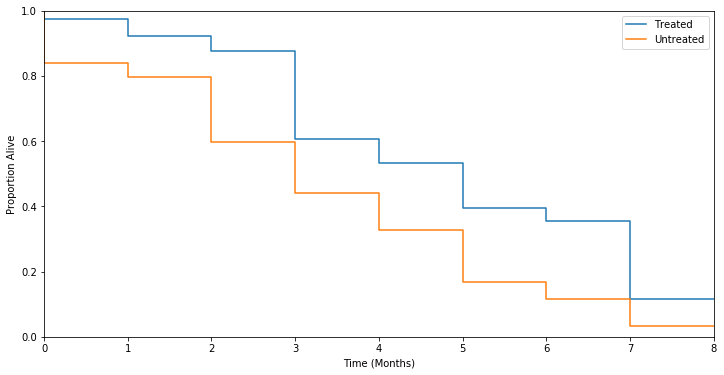

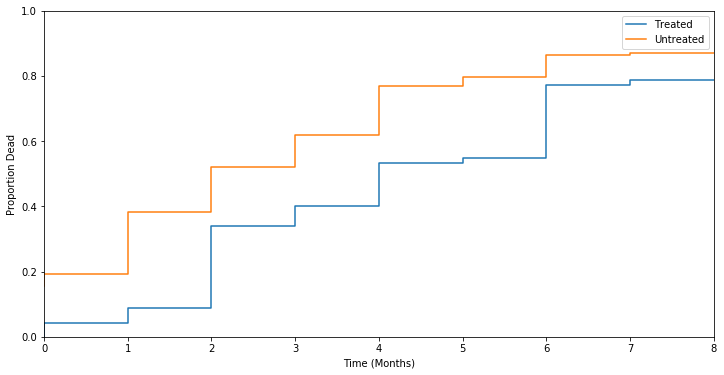

Logrank Test:

Chi-squared = 269.5208122934779 p < 0.001

Hazard ratio =  0.5793836490943047


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

# information about the logrank test was gotten from: https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_survival/BS704_Survival5.html
# and from 'An Introduction to Medical Statistics' by Martin Bland, chapter 16

# simulating a time-to-event data sample

n = np.random.randint(500, 5000)

treatment_prop = np.random.uniform(0.4, 0.6)

n_treated = np.int(np.round(n * treatment_prop))

n_untreated = n - n_treated

df = pd.DataFrame(columns = ['n_treated', 'deaths_treated', 'withdrawn_treated', 'n_untreated',
                           'deaths_untreated', 'withdrawn_untreated', 'proportion_dead',
                           'expected_deaths_treated', 'expected_deaths_untreated'])


# setting the mean of the distribution for deaths per unit of time for the treated and untreated samples
# setting an influence for the rate of withdrawals per unit of time

hazardousness = np.random.uniform(low = 0.05, high = 0.08)

withdrawal = np.random.uniform(low = 0.01, high = 0.1)

treated_death_mu = np.random.randint(1, 2+n_treated*hazardousness)

untreated_death_mu = treated_death_mu + np.random.randint(1,10)


# generating time-to-event data
time = np.array([0])
for i in np.arange(np.random.randint(25,51)):
    n_treated_start = n_treated
    n_untreated_start = n_untreated
    # the number of treated people who died on this iteration
    n_die_treat = np.random.normal(treated_death_mu, treated_death_mu*2)
    n_die_treat = np.abs(n_die_treat)
    n_die_treat = np.round(n_die_treat)
    n_die_treat = np.int(n_die_treat)
    
    # adding further randomness into the number of treated people who died
    bias = np.random.uniform()
    biased_coin = np.random.choice(['not_less', 'less'], p = [bias, 1 - bias])
    
    # if the biased coin lands on 'less' then the number of deaths for treated people is reduced on the current iteration
    if biased_coin == 'less':
      n_die_treat = n_die_treat * np.random.uniform(low = 0.3)
      n_die_treat = np.abs(n_die_treat)
      n_die_treat = np.round(n_die_treat)
      n_die_treat = np.int(n_die_treat)
      
    # the number of untreated people who died on this iteration
    n_die_untreat = np.random.normal(untreated_death_mu, untreated_death_mu*2)
    n_die_untreat = np.abs(n_die_untreat)
    n_die_untreat = np.round(n_die_untreat)
    n_die_untreat = np.int(n_die_untreat)
      
    
    # adding further randomness into the number of untreated people who died
    bias = np.random.uniform()
    biased_coin = np.random.choice(['not_less', 'less'], p = [bias, 1 - bias])
    
    # if the biased coin lands on 'less' then the number of deaths for untreated people is reduced on the current iteration
    if biased_coin == 'less':
      n_die_untreat = n_die_untreat * np.random.uniform(low = 0.3)
      n_die_untreat = np.abs(n_die_untreat)
      n_die_untreat = np.round(n_die_untreat)
      n_die_untreat = np.int(n_die_untreat)
    
    # calculating the proportion of total deaths out of the total sample size
    prop_dead = (n_die_treat + n_die_untreat)/(n_treated + n_untreated)
    
    # calculating the expected deaths under h0: the treatment has no effect
    expected_deaths_treated = n_treated * prop_dead
    
    expected_deaths_untreated = n_untreated * prop_dead
    
    # adding in a random number of withdrawals
    n_withdr_treat = np.random.randint(1, 2+n * withdrawal)
    
    n_withdr_untreat = np.random.randint(1, 2+n * withdrawal)
    
    # updating the totals based on the number of deaths and withdrawals
    n_treated = n_treated - n_die_treat - n_withdr_treat
   
    
    n_untreated = n_untreated - n_die_untreat - n_withdr_untreat
    
    # breaking the loop if all the treated or untreated people are dead
    if n_treated <= 0 or n_untreated <= 0:
        break
    
    # appending the results of this iteration to the dataframe
    current_time = {'n_treated': n_treated_start, 'deaths_treated': n_die_treat, 'withdrawn_treated': n_withdr_treat,
                   'n_untreated': n_untreated_start, 'deaths_untreated': n_die_untreat, 'withdrawn_untreated': n_withdr_untreat,
                   'proportion_dead': np.round(prop_dead,4), 'expected_deaths_treated':np.round(np.int(expected_deaths_treated)), 
                    'expected_deaths_untreated':np.round(np.int(expected_deaths_untreated))}
    
    df = df.append([current_time])
    time = time + 1
    
# renaming the dataframe index        
df.index = np.arange(time)
df.index.rename('Time', inplace = True)

# displaying the dataframe
display(df.head())
display(df.tail())

# plotting the survival curve
plt.figure(figsize = (12,6))
plt.step(np.arange(len(df)),df.n_treated/(df.n_treated.iloc[0]), label = 'Treated')
plt.step(np.arange(len(df)),df.n_untreated/(df.n_untreated.iloc[0]), label = 'Untreated')
plt.axis([0, max(df.index), 0, 1])
plt.legend()
plt.xlabel('Time (Months)')
plt.ylabel('Proportion Alive')
plt.show()

# plotting the 'death curve'
plt.figure(figsize = (12,6))
plt.step(np.arange(len(df)),np.cumsum(df.deaths_treated)/(df.n_treated.iloc[0]), label = 'Treated')
plt.step(np.arange(len(df)),np.cumsum(df.deaths_untreated)/(df.n_untreated.iloc[0]), label = 'Untreated')
plt.axis([0, max(df.index), 0, 1])
plt.legend()
plt.xlabel('Time (Months)')
plt.ylabel('Proportion Dead')
plt.show()


# calculating the chi-squared statistic and associated p-value for the logrank test
chi_sq_i = (df.deaths_treated.sum() - df.expected_deaths_treated.sum())**2/df.expected_deaths_treated.sum()
chi_sq_ii = (df.deaths_untreated.sum() - df.expected_deaths_untreated.sum())**2/df.expected_deaths_untreated.sum()

chi_sq = chi_sq_i + chi_sq_ii

p = 1 - scipy.stats.chi2.cdf(chi_sq, df = 1)

if p == 0:
  p = '< 0.001'
else:
  p = '= '+str(p)

# calculating the hazard ratio
hazard_ratio = (df.deaths_treated.sum()/df.expected_deaths_treated.sum())/(df.deaths_untreated.sum()/df.expected_deaths_untreated.sum())


# printing the results
print('Logrank Test:')
print()
print('Chi-squared =', chi_sq, 'p', p)
print()
print('Hazard ratio = ', hazard_ratio)

